In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv("framingham.csv")

# List all the feature column names
feature_cols = [
    "male", "age", "education", "currentSmoker", "cigsPerDay", "BPMeds",
    "prevalentStroke", "prevalentHyp", "diabetes", "totChol", "sysBP",
    "diaBP", "BMI", "heartRate", "glucose"
]

df_cleaned = df.dropna()
# print("Any NaN in X:", np.isnan(df).any())

# Extract all features at once
X_train = df_cleaned[feature_cols].values  # Converts to a NumPy array

# Extract target variable
y_train = df_cleaned["TenYearCHD"].values  # Converts target column to NumPy array



print(X_train.shape[0])
print(y_train.shape)

print(X_train)

# print("Checking for NaN or Inf in X and y...")
# print("Any NaN in X:", np.isnan(X_train).any())
# print("Any NaN in y:", np.isnan(y_train).any())
# print("Any Inf in X:", np.isinf(X_train).any())
# print("Any Inf in y:", np.isinf(y_train).any())
# print(df.head())

3656
(3656,)
[[  1.    39.     4.   ...  26.97  80.    77.  ]
 [  0.    46.     2.   ...  28.73  95.    76.  ]
 [  1.    48.     1.   ...  25.34  75.    70.  ]
 ...
 [  1.    50.     1.   ...  25.97  66.    86.  ]
 [  1.    51.     3.   ...  19.71  65.    68.  ]
 [  0.    52.     2.   ...  21.47  80.   107.  ]]


In [4]:
def normalize(X):
    x_min = X.min(axis=0)
    x_max = X.max(axis=0)

    return (X - x_min) / (x_max - x_min)

In [5]:
X_train = normalize(X_train)

print(X_train)

[[1.         0.18421053 1.         ... 0.27702375 0.36363636 0.10451977]
 [0.         0.36842105 0.33333333 ... 0.31968008 0.51515152 0.10169492]
 [1.         0.42105263 0.         ... 0.23751818 0.31313131 0.08474576]
 ...
 [1.         0.47368421 0.         ... 0.2527872  0.22222222 0.1299435 ]
 [1.         0.5        0.66666667 ... 0.10106641 0.21212121 0.07909605]
 [0.         0.52631579 0.33333333 ... 0.14372273 0.36363636 0.18926554]]


In [6]:
def sigmoid(z):
    if np.isinf(np.exp(-z).any()):
        print(z)
    g_of_z = 1/(1+np.exp(-z))
    return g_of_z
    

In [7]:
def compute_cost(X, y, w, b, *argv):
    m = X.shape[0]
    cost = 0
    epsilon = 1e-10  # Small constant to prevent log(0)

    for i in range(m):
        z_wb_x_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_wb_x_i)

        # Clip f_wb_i to avoid log(0)
        f_wb_i = np.clip(f_wb_i, epsilon, 1 - epsilon)
        
        loss = -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
        cost += loss

    return cost / m

In [8]:
print(compute_cost(X_train, y_train, 3, 3))

[3.65012096 3.67629098 3.42375385 3.80229423 2.89794186 2.65085256
 2.60193299 3.27875114 2.64279822 3.20460666 3.13105917 3.47926963
 3.18989936 3.37531764 2.86955035]


In [8]:
def compute_gradient(X, y, w, b, *argv):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        z_wb_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_wb_i)
        err = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i][j]
        dj_db += err

    return dj_dw, dj_db
            

In [9]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_ = 1): 
    w = w_in.copy()
    b = b_in

    J_history = []
    w_history = []

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b, lambda_)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = cost_function(X, y, w, b, lambda_)

        if i % 100 == 0:
            print(cost)

        J_history.append(cost)

    return w, b, J_history

In [10]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    cost = compute_cost(X, y, w, b)

    m, n = X.shape
    reg_cost = 0

    for j in range(n):
        reg_cost += w[j] ** 2

    reg_cost = reg_cost * (lambda_ / (2 * m))

    total_cost = reg_cost + cost

    return total_cost

In [11]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1):
    dj_dw, dj_db = compute_gradient(X, y, w, b)

    m,n = X.shape

    for j in range(n):
        dj_dw[j] += (lambda_ / m) * w[j]

    return dj_dw, dj_db

In [13]:
w_in = np.zeros(X_train.shape[1])
b_in = 0.
alpha = 0.001
lambda_ = 1

# w, b, J_history = gradient_descent(X_train, y_train, w_in, b_in, compute_cost, compute_gradient, alpha, 1000)
w, b, J_history = gradient_descent(X_train, y_train, w_in, b_in, compute_cost_reg, compute_gradient_reg, alpha, 1000, lambda_)


print(w, b)

0.5280780479122731
0.3846316761265566
0.3811619319535497
0.380092753818394
0.37968586057691117
0.3795362644134994
0.37949818425235565
0.37951227892459527
0.37955200738487777
0.3796042561533578
[ 5.37757782e-01  2.46685875e+00 -1.54780073e-01  7.10626339e-02
  1.24775939e+00  1.84055885e-01  6.72605564e-01  2.61749626e-01
  2.12756547e-01  1.05657260e+00  2.64797977e+00  4.57531124e-04
  1.95694507e-01 -2.89279896e-01  1.96657912e+00] -4.67593400449253


In [14]:
def predict(X, w, b):
    m = X.shape[0]
    p = np.zeros((m,))


    for i in range(m):
        z_wb_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_wb_i)

        if f_wb_i >= 0.5:
            print(f_wb_i)
            p[i] = 1
        else:
            p[i] = 0

    return p

    

In [15]:
def compare_with_actual_values(p, y):
    m = p.shape[0]

    y_length = y.shape[0]
    got_correct = 0
    for i in range(m):
        # print(p[i])
        if p[i] == y[i]:
            got_correct += 1
        # else:
            # print(p[i], y[i])

    return f"Number of examples: {y_length}, got correct: {got_correct}."

In [16]:
p = predict(X_train, w, b)
print(compare_with_actual_values(p, y_train))

0.528264756569197
0.524407443663708
0.5012885475299312
0.5207577833808336
0.5095000981829642
0.5036657403968351
0.5960464942162079
0.6796420438713613
0.5013875657405282
0.5194510999694484
0.577470639881657
0.5528050478529369
0.6244599472136659
0.5681436054348388
0.6357588541954322
0.5445566098777308
0.5300292792423175
0.6195131020102213
0.5580684340961319
0.5391240269046988
0.5070048069174018
0.5923313989265602
0.544483514918391
0.5330407336574118
0.6403144672464962
0.7058724388618177
0.5620376830252726
0.5761901278786616
0.6247917837482988
0.5593539374461491
0.6025874065925633
0.5184811280350631
0.502482786850884
0.5005283650720905
0.5040713674393593
0.5391449370640751
0.5554752951301517
0.5359194799313419
0.5696132018801819
0.503267388263918
0.5303143782654484
0.6242172598137298
0.7111720704947833
0.6298344479253418
0.5207639535140254
0.8868216167657744
0.5380762769178643
0.5897907874780198
0.5010982387351165
0.504685456780999
0.5702722655125866
0.6350948540990532
0.6026929267444572


In [16]:
print(compute_cost(X_train, y_train, w, b))

0.7379093793322845


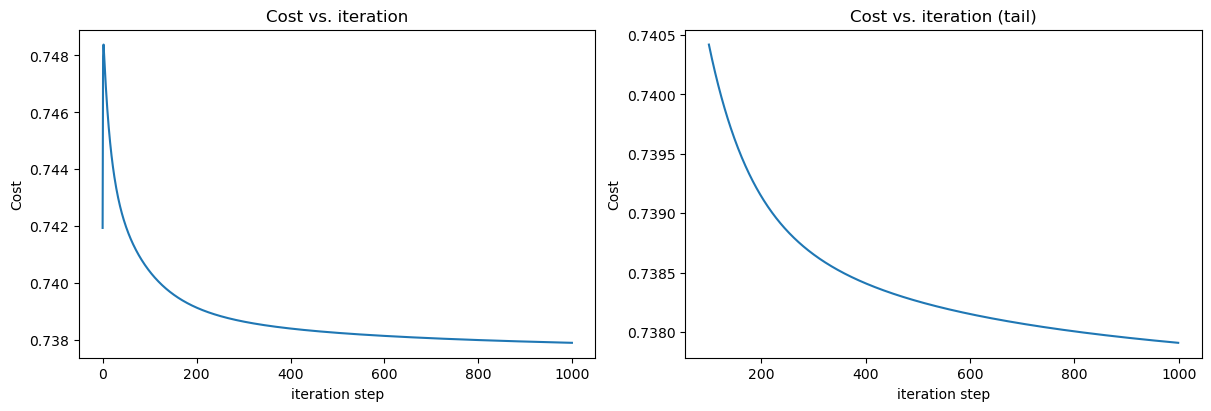

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()